In [1]:
import pandas as pd
import numpy as np
from plotutils import *
np.seterr(all='raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# logit

In [2]:
logdir='../IPG/test/log'; date='06_12_2021'
subsolver='projectedGD'; warm_start=True
loss='logit'; lam_shrink=[0.8, 0.1, 0.01]; group_size=[10, 100]; overlap_ratio=[0.1, 0.3, 0.5]; excludes= None

In [3]:
inexact_type=1; param1_lst = [1e-12]; param2_lst = ['empty']
algo_df_dict_inexact_type1 = get_all(logdir, date, inexact_type, loss, subsolver, warm_start,
                             lam_shrink, group_size, overlap_ratio,
                             excludes, param1_lst, param2_lst)
ppf = PerformanceProfile(algo_df_dict_inexact_type1)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
inexact_type1_best = '1-projectedGD-True-1e-12-empty'
print('Best params:', inexact_type1_best)

1-projectedGD-True-1e-12-empty
  97/108 instances terminate with status:  0
   5/108 instances terminate with status:  2
   6/108 instances terminate with status:  1
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 86 instances are kept.
Best params: 1-projectedGD-True-1e-12-empty


In [4]:
# algo_df_dict_inexact_type1['1-projectedGD-True-1e-12-empty'][algo_df_dict_inexact_type1['1-projectedGD-True-1e-12-empty']['status'] != 0]
# algo_df_dict_inexact_type1['1-projectedGD-True-1e-12-empty']

In [5]:
inexact_type=2; param1_lst = [1e-12]; param2_lst = [0.1, 0.5, 0.9]
algo_df_dict_inexact_type2 = get_all(logdir, date, inexact_type, loss, subsolver, warm_start,
                             lam_shrink, group_size, overlap_ratio,
                             excludes, param1_lst, param2_lst)
ppf = PerformanceProfile(algo_df_dict_inexact_type2)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
inexact_type2_best = get_best(pools)
# inexact_type2_best = '2-projectedGD-True-1e-12-0.5'
print('Best params:', inexact_type2_best)

2-projectedGD-True-1e-12-0.1
 102/108 instances terminate with status:  0
   6/108 instances terminate with status:  1
2-projectedGD-True-1e-12-0.5
 100/108 instances terminate with status:  0
   6/108 instances terminate with status:  1
   2/108 instances terminate with status:  2
2-projectedGD-True-1e-12-0.9
  95/108 instances terminate with status:  0
   7/108 instances terminate with status:  2
   5/108 instances terminate with status:  1
   1/108 instances terminate with status: -2
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 86 instances are kept.
Best params: 2-projectedGD-True-1e-12-0.1


In [6]:
inexact_type=3; param1_lst = [3.0]; param2_lst = [1e-1, 1e0,  1e3, 1e5]
algo_df_dict_inexact_type3 = get_all(logdir, date, inexact_type, loss, subsolver, warm_start,
                             lam_shrink, group_size, overlap_ratio,
                             excludes, param1_lst, param2_lst)
ppf = PerformanceProfile(algo_df_dict_inexact_type3)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
# print("=================")
inexact_type3_best = get_best(pools)
# inexact_type3_best = '3-projectedGD-True-3.0-1.0'
print('Best params:', inexact_type3_best)

3-projectedGD-True-3.0-0.1
  80/108 instances terminate with status:  0
  25/108 instances terminate with status:  2
   3/108 instances terminate with status:  1
3-projectedGD-True-3.0-1.0
  84/108 instances terminate with status:  0
  20/108 instances terminate with status:  2
   4/108 instances terminate with status:  1
3-projectedGD-True-3.0-1000.0
  93/108 instances terminate with status:  0
   9/108 instances terminate with status:  2
   5/108 instances terminate with status:  1
   1/108 instances terminate with status: -2
3-projectedGD-True-3.0-100000.0
 101/108 instances terminate with status:  0
   6/108 instances terminate with status:  1
   1/108 instances terminate with status:  2
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 86 instances are kept.
Best params: 3-projectedGD-True-3.0-100000.0


All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 86 instances are kept.


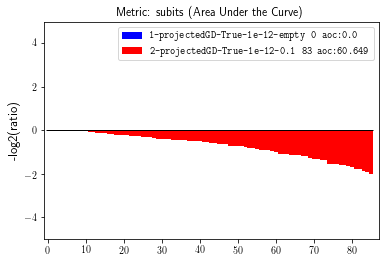

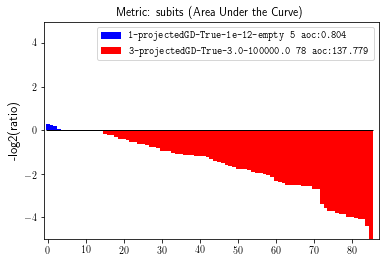

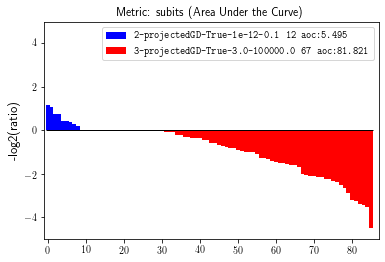

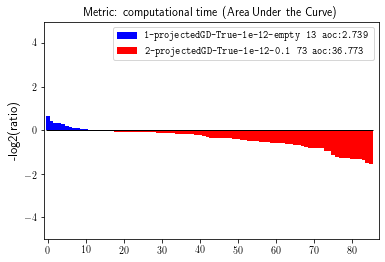

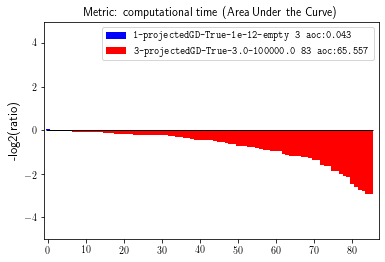

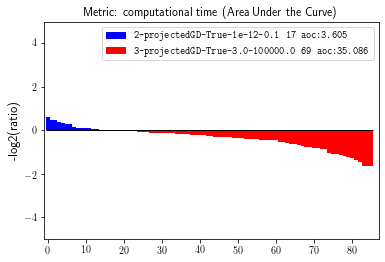

In [20]:
final = {}
final[inexact_type1_best] = algo_df_dict_inexact_type1[inexact_type1_best]
final[inexact_type2_best] = algo_df_dict_inexact_type2[inexact_type2_best]
final[inexact_type3_best] = algo_df_dict_inexact_type3[inexact_type3_best]
ppf = PerformanceProfile(final)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='subits',show_num=True, options={'ratio_max':5})
_ = ppf.plot(column='time',show_num=True, options={'ratio_max':5})

All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 86 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 86 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 86 instances are kept.


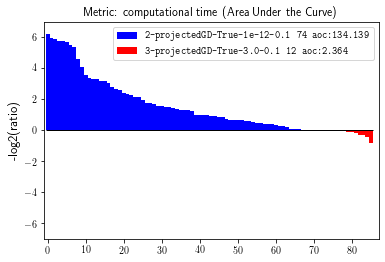

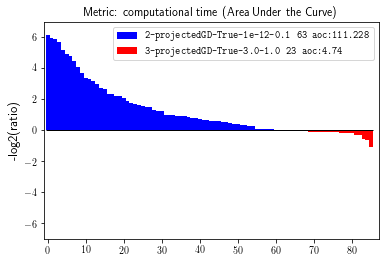

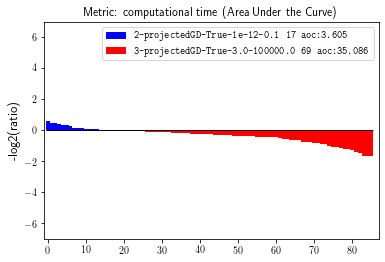

In [21]:
for c in [1e-1, 1e0, 1e5]:
    final = {}
    final[inexact_type2_best] = algo_df_dict_inexact_type2[inexact_type2_best]
    type3_sensitivity = f'3-projectedGD-True-3.0-{c}'
    final[type3_sensitivity] = algo_df_dict_inexact_type3[type3_sensitivity]
    ppf = PerformanceProfile(final)
    ppf.get_subset_by_time(threshold=1, remove_failed=True)
    _ = ppf.plot(column='time',show_num=True, options={'ratio_max':7})

In [13]:
cols = ['datasetid', 'iteration', 'subits', 'f', 'time', 'nz']
df2 = algo_df_dict_inexact_type2[inexact_type2_best][cols]; df3 = algo_df_dict_inexact_type3[inexact_type3_best][cols]
df2 = df2[df2['time']>=1];df3 = df3[df3['time']>=1]
df_mergeed = pd.merge(df2, df3, on='datasetid', suffixes=("_type2", "_type3"))

In [16]:
print(np.sum(df_mergeed['subits_type2'] < df_mergeed['subits_type3']))
print(np.sum(df_mergeed['iteration_type2'] < df_mergeed['iteration_type3']))
print(np.sum(df_mergeed['time_type2'] < df_mergeed['time_type3']))

12
35
17
